In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from joblib import dump, load

In [36]:
data = pd.read_csv("Loan_default.csv")

In [4]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [6]:
data.describe(include="object").transpose()

,count,unique,top,freq
LoanID,255347,255347,I38PQUQS96,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


<Axes: >

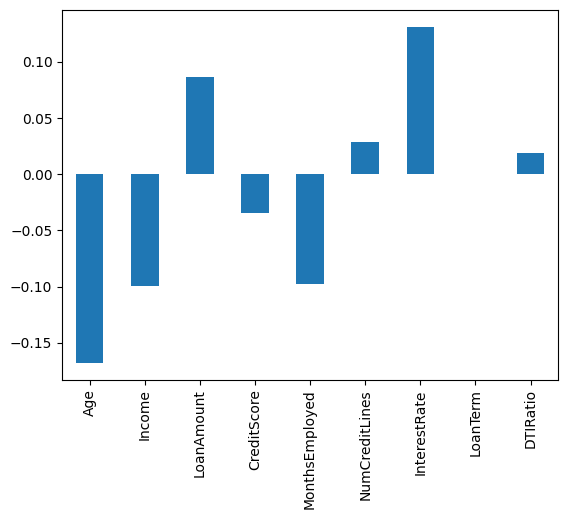

In [7]:
data.corr(numeric_only=True)["Default"].drop("Default").plot(kind="bar")

In [8]:
data.drop("LoanID", axis=1, inplace=True)

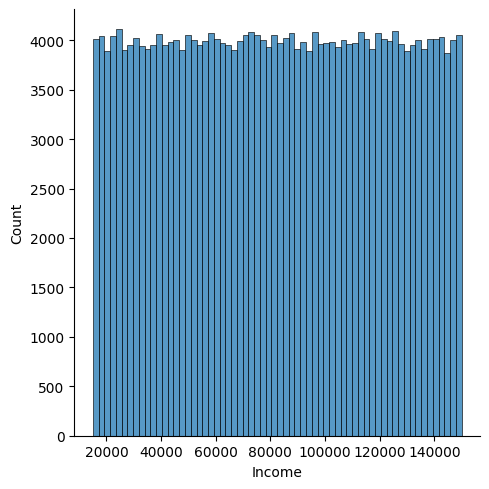

In [9]:
sns.displot(data=data, x="Income")

In [10]:
X = pd.get_dummies(data.drop("Default", axis=1), drop_first=True, dtype="int")
y = data["Default"]

In [11]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,1,0,0,0,1,0,0,0,0,0


In [41]:
X.shape

(148264, 24)

In [12]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [13]:
Random_under_sample = RandomUnderSampler(sampling_strategy=0.4, random_state=101)

In [14]:
X,y = Random_under_sample.fit_resample(X,y)

In [15]:
over_sample = SMOTE(sampling_strategy="auto", random_state=101)

In [16]:
X,y = over_sample.fit_resample(X,y)

# Now using Randaom Forest

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

### Split the data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

### Standardize the features

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Create a Random forest Model

In [20]:
rfc_model = RandomForestClassifier()

In [21]:
rfc_model.fit(X_train,y_train)

RandomForestClassifier()

In [22]:
y_pred = rfc_model.predict(X_test)

### import Metrics

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     22138
           1       0.85      0.73      0.78     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.80     44480
weighted avg       0.80      0.80      0.80     44480



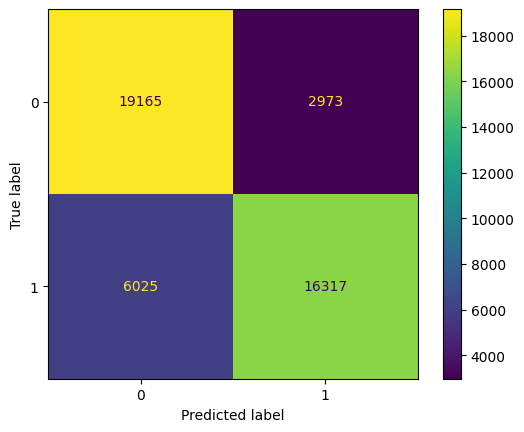

In [25]:
cm = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()

# Create model

In [27]:
def general_model(model_instance):
    model = model_instance()
    model.fit(X_train,y_train)
    y_prediction = model.predict(X_test)
    print(classification_report(y_test,y_prediction))
    cm = confusion_matrix(y_test,y_prediction)
    dist = ConfusionMatrixDisplay(cm)
    dist.plot()

In [28]:
from sklearn.svm import SVC

In [29]:
general_model(SVC)

# Using Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
X1 = X.values
y1 = y.values

In [ ]:
y1.shape

(148264,)

In [ ]:
X1.shape

(148264, 24)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)

In [ ]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(32, activation="relu", input_shape=(24,)))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stoping = EarlyStopping(patience=3, verbose=1)

In [ ]:
#model.fit(X1_train, y1_train, epochs=50, validation_data=(X1_test,y1_test), callbacks=[early_stoping])

Epoch 1/50
3244/3244 [==============================] - 8s 2ms/step - loss: 0.4924 - accuracy: 0.7622 - val_loss: 0.4425 - val_accuracy: 0.7886
Epoch 2/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4624 - accuracy: 0.7837 - val_loss: 0.4356 - val_accuracy: 0.7895
Epoch 3/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4566 - accuracy: 0.7852 - val_loss: 0.4331 - val_accuracy: 0.7928
Epoch 4/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4539 - accuracy: 0.7868 - val_loss: 0.4401 - val_accuracy: 0.7923
Epoch 5/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4514 - accuracy: 0.7892 - val_loss: 0.4300 - val_accuracy: 0.7941
Epoch 6/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4507 - accuracy: 0.7887 - val_loss: 0.4285 - val_accuracy: 0.7938
Epoch 7/50
3244/3244 [==============================] - 7s 2ms/step - loss: 0.4484 - accuracy: 0.7893 - val_loss: 0.4283 - val_accuracy:

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
losses= metrics[["loss", "val_loss"]]

<Axes: >

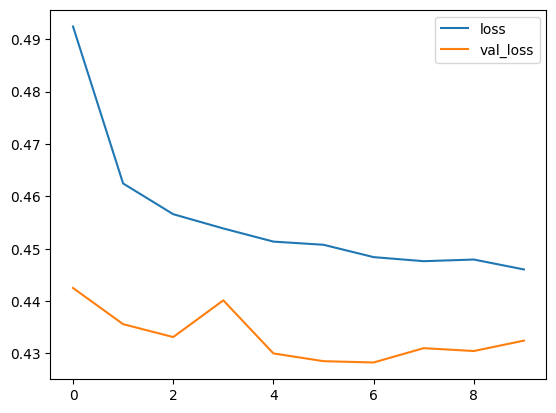

In [ ]:
losses.plot()

In [ ]:
y_pred1 = (model.predict(X1_test)>0.5).astype(np.int64)

   1/1390 [..............................] - ETA: 22s

1390/1390 [==============================] - 1s 840us/step


In [ ]:
y_pred1

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int64)

In [ ]:
print(classification_report(y1_test,y_pred1))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81     22138
           1       0.84      0.74      0.79     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.80     44480
weighted avg       0.80      0.80      0.80     44480



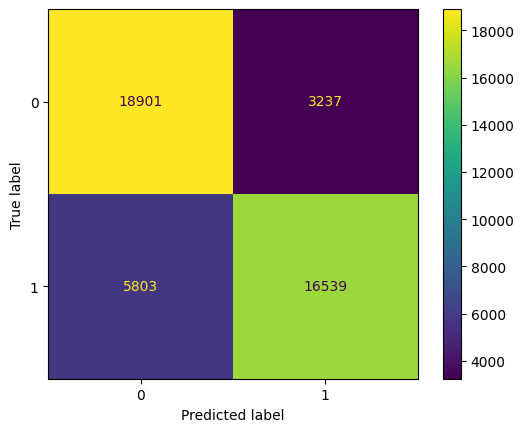

In [ ]:
cm = confusion_matrix(y1_test,y_pred1)
display = ConfusionMatrixDisplay(cm)
display.plot()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5],
}

In [ ]:
grid_search_model = GridSearchCV(estimator=rfc_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search_model.fit(X_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=2)

In [ ]:

y_pred2 = grid_search_model.predict(X_test)


In [ ]:
grid_search_model.best_params_

{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.87      0.81     22138
           1       0.85      0.74      0.79     22342

    accuracy                           0.80     44480
   macro avg       0.81      0.80      0.80     44480
weighted avg       0.81      0.80      0.80     44480



In [ ]:
cm = confusion_matrix(y_test,y_pred2)

In [ ]:
display2 = ConfusionMatrixDisplay(cm)

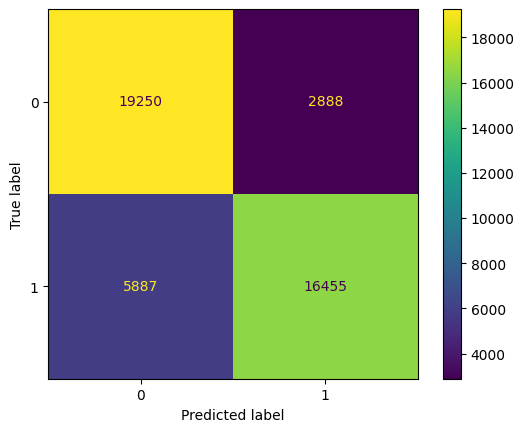

In [ ]:
display2.plot()

In [26]:
pipieline = Pipeline([("scaler", scaler),
                      ("model", rfc_model)])

In [28]:
pipieline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [29]:
pred__ = pipieline.predict(X_test)

In [30]:
print(classification_report(y_test, pred__))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81     22138
           1       0.85      0.73      0.78     22342

    accuracy                           0.80     44480
   macro avg       0.80      0.80      0.80     44480
weighted avg       0.81      0.80      0.80     44480



In [31]:
dump(pipieline,"loan_defaul_model.joblib")

['loan_defaul_model.joblib']

In [32]:
X.columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio',
       'Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_Yes', 'HasDependents_Yes',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_Yes'],
      dtype='object')

In [38]:
data["Education"].value_counts()

Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64

In [39]:
data["MaritalStatus"].value_counts()

MaritalStatus
Married     85302
Divorced    85033
Single      85012
Name: count, dtype: int64

In [40]:
data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [42]:
X_train.shape

(103784, 24)